## <div style="color:white;display:fill;border-radius:8px;background-color:#323232;font-size:150%; letter-spacing:1.0px"><p style="padding: 12px;color:white;"><b><b><span style='color:white'><span style='color:#F1A424'>4 |</span></span></b> Modelling</b></p></div>

**We have divided our analysis into two distinct tasks: `binary` and `multiclass` classification.**

**In the `binary classification` task, our model will focus on accurately predicting whether a tweet's sentiment is either "Positive" or "Negative."**

**Once this `binary classification` is established, we will expand our analysis to incorporate the "Neutral" sentiment category. This will create a three-way classification system.**

**Both `binary and multiclass` classification offer valuable insights and have diverse potential applications.**

In [1]:
import re
import string
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  #plotting statistical graphs
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
import squarify
from collections import Counter

# Load the Text Cleaning Package
import neattext.functions as nfx

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator ##is a data visualization technique used
#for representing text data in which the size of each word indicates its frequency

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix,roc_auc_score,classification_report, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.linear_model import RidgeClassifier,SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm ##new progress bars repeatedly
import os
import nltk ##building Python programs to work with human language data
#import spacy #for training the NER model tokenize words
#import random
#from spacy.util import compounding
#from spacy.util import minibatch


pd.set_option('max_colwidth', 400)
pd.set_option('use_mathjax', False)


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'D:\Natural Language Processing\Phase 4 Project\data\processed_data.csv')

df.head()

,clean_tweet,preprocessed_tweet,lemma_preprocessed_tweet,stemma_preprocessed_tweet,sentiment
0,despot uhuru kenyattas olympian performance drinking looting dens funeral committees fallen thieves tribalists dictators 10 year legacy kenyans remember punish dubious legacy august 9th,despot uhuru kenyattas olympian performance drinking looting dens funeral committees fallen thieves tribalists dictators 10 year legacy kenyans remember punish dubious legacy august 9th,despot uhuru kenyattas olympian performance drinking looting den funeral committee fallen thief tribalists dictator 10 year legacy kenyan remember punish dubious legacy august 9th,despot uhuru kenyatta olympian perform drink loot den funer committe fallen thiev tribalist dictat 10 year legaci kenyan rememb punish dubiou legaci august 9th,Neutral
1,president lawyer agree issues best mp westlands tim wanyonyi good man coward legislated parliament parliament deserves eloquent brilliant warriors like,president lawyer agree issues best mp westlands tim wanyonyi good man coward legislated parliament parliament deserves eloquent brilliant warriors like,president lawyer agree issue best mp westlands tim wanyonyi good man coward legislated parliament parliament deserves eloquent brilliant warrior like,presid lawyer agre issu best mp westland tim wanyonyi good man coward legisl parliament parliament deserv eloqu brilliant warrior like,Positive
2,alleged ruto stolen uhuru kenyatta disclose uhuru kenyatta stolen stashed sh 25 trillion 9 years argument implies ruto trillionaire broke genuinely mourning,alleged ruto stolen uhuru kenyatta disclose uhuru kenyatta stolen stashed sh 25 trillion years argument implies ruto trillionaire broke genuinely mourning,alleged ruto stolen uhuru kenyatta disclose uhuru kenyatta stolen stashed sh 25 trillion year argument implies ruto trillionaire broke genuinely mourning,alleg ruto stolen uhuru kenyatta disclos uhuru kenyatta stolen stash sh 25 trillion year argument impli ruto trillionair broke genuin mourn,Positive
3,credible evidence timestamped image inside vehicle,credible evidence timestamped image inside vehicle,credible evidence timestamped image inside vehicle,credibl evid timestamp imag insid vehicl,Positive
4,tweet white people homeless,tweet white people homeless,tweet white people homeless,tweet white peopl homeless,Neutral


## <b>4.1 <span style='color:#F1A424'>|</span> Multiclass Classification</b>

**Now that we have looked at this as a binary classification problem, it's time to mix in the "Neutral" sentiment and try out a couple types of models to see how the performance changes.**

---
**What is our choice metric for this task?**

"Recall-Macro Average" is our metric:

- It provides a measure of the completeness of a sentiment classification model. Recall tells us what percentage of actual positive, negative and neutral tweets were correctly classified by the model. High recall means most of the actual tweets of a particular sentiment were captured.

- It balances precision. Precision tells us what percentage of predicted positive/negative/neutral tweets were correct. Recall complements this by telling us what we missed. Together they provide a better picture of classification performance.

- It allows comparison across sentiment categories. The macro-average aggregates the individual recall scores from each sentiment category into an overall unbiased score. This allows equal weight to model performance on positive, negative and neutral classes despite class imbalances.

- It indicates real-world usefulness. High recall suggests a model is able to correctly identify most real-world tweets of a particular sentiment. This is crucial for practical usage in areas like brand monitoring, customer support, etc.

- Weighted higher in most tweet sentiment analyses. Recall is crucial for sentiment analyses because false negatives (missed detections) are usually costlier than false positives. Thus recall is assigned a higher weight while evaluating social media sentiment models.

### <b>4.1.1 <span style='color:#F1A424'>|</span> Train Test Split</b>

In [3]:
# import train test split
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df['lemma_preprocessed_tweet'],
                                                    df['sentiment'],
                                                    test_size=0.2,
                                                    random_state = 0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17092,), (4273,), (17092,), (4273,))

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Assuming y_train and y_test are your labels
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

le.classes_

array(['Negative', 'Neutral', 'Positive'], dtype=object)

### <b>4.1.2 <span style='color:#F1A424'>|</span> Baseline Model & Feature Extraction</b>

- **In order to be able to evaluate our model performances and truly assess how well they are performing compared to random guessing, we will build a dummy classifier as our baseline.**
- **Before diving into hyperparameter tuning, take a step back to establish a baseline for your model's performance. Capture its current metrics before optimizing any settings. This crucial step allows you to clearly assess and demonstrate any improvements resulting from your tuning efforts. Establishing a baseline also strengthens stakeholder engagement and supports your narrative when explaining your methodology.**
- **We will convert text from text to vector using **TF-IDF** vectorizer. **TF-IDF** stands for **Term Frequency-Inverse Document Frequency**. It is a technique to quantify a word in documents, we generally compute a weight to each word which signifies the importance of the word in the document and corpus. This method is a widely used technique in Information Retrieval and Text Mining.**

In [5]:
df['sentiment'].value_counts()

sentiment
Neutral     8561
Positive    6472
Negative    6332
Name: count, dtype: int64

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_curve, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import numpy as np

def multiclass_eval(y_true, y_pred, X_test, X_train, clf, n_class=3):
    """This function shows the classification report,
    the confusion matrix as well as the ROC curve for evaluation of 
    model quality for multiclass models.
    
    y_true: Correct y values, typically y_test that comes from the 
    train_test_split performed at the beginning of model development.
    y_pred: Predicted y values by the model.
    clf: classifier model that was fit to training data.
    X_test: X_test values from train_test_split
    X_train: X_train values from train_test_split"""
    
    #training and test scores
    print(f"Training Score: {round(clf.score(X_train, y_train),2)} \
            Test Score:{round(clf.score(X_test, y_true),2)}")
    
    #Classification report
    print("\n")
    print("CLASSIFICATION REPORT")
    print("------------------------------------------")
    print(classification_report(y_true=y_true, y_pred=y_pred))
    
    #Creating a figure/axes for confusion matrix and ROC curve
    fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
    
    #Plotting the normalized confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    ConfusionMatrixDisplay(confusion_matrix=cm, 
                           display_labels=['Negative', 'Neutral', 'Positive']).plot(ax=ax[0], cmap='Greens')
    
    pred_prob = clf.predict_proba(X_test)
    
    #Plotting the ROC curve
    fpr={}
    tpr={}
    thresh={}
    
    for i in range(n_class):    
        fpr[i], tpr[i], thresh[i] = roc_curve(y_true, pred_prob[:,i], pos_label=i)
    
    ax[1].plot(fpr[0], tpr[0], linestyle='--',color='red', label='Negative vs Rest')
    ax[1].plot(fpr[1], tpr[1], linestyle='--',color='blue', label='Neutral vs Rest')
    ax[1].plot(fpr[2], tpr[2], linestyle='--',color='green', label='Positive vs Rest')
    ax[1].set_title('Multiclass ROC curve')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive rate')
    ax[1].legend(loc='best')
    
    #Plotting the 50-50 guessing plot for reference
    ax[1].plot([0,1], [0,1], ls='--', color='orange')


#### <b>4.1.2.1 <span style='color:#F1A424'>|</span> Baseline Logistic Regression Model</b>

Training Score: 0.93             Test Score:0.81


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.74      0.80      1324
           1       0.77      0.92      0.84      1746
           2       0.83      0.74      0.78      1203

    accuracy                           0.81      4273
   macro avg       0.83      0.80      0.81      4273
weighted avg       0.82      0.81      0.81      4273



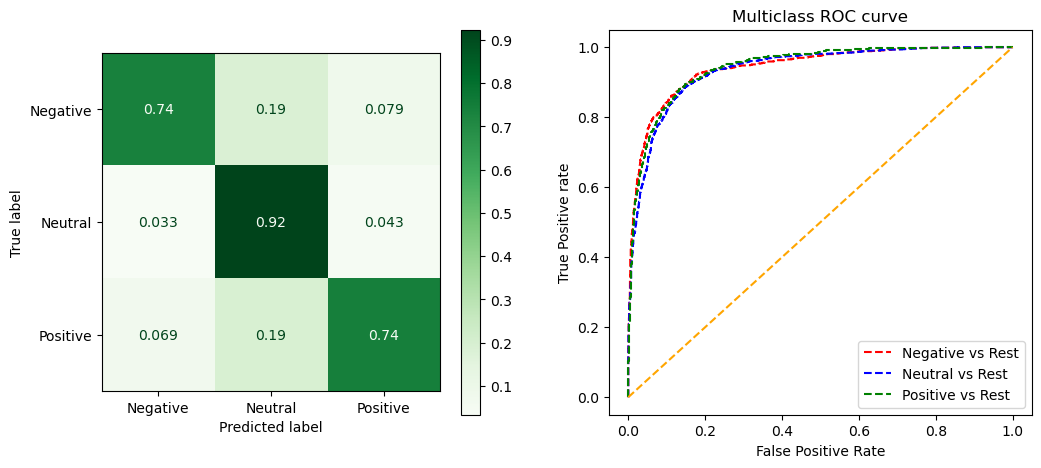

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression


baseline_log_clf = Pipeline([('vectorizer', TfidfVectorizer()),
                                ('classifier', LogisticRegression())])

baseline_log_clf.fit(X_train, y_train)

# Making our predictions
y_pred = baseline_log_clf.predict(X_test)


multiclass_eval(y_test, y_pred, X_test, X_train, baseline_log_clf, n_class=3)


**The baseline LR classifier is correctly guessing 92% of the tweets as "Neutral". This suggests that there is a class imbalance with the data that where we have mostly "Neutral" tweets. The LR model is also correctly guessing the "negative" and "postive" tweets as 74%.**

## <div style="color:white;display:fill;border-radius:8px;background-color:#323232;font-size:150%; letter-spacing:1.0px"><p style="padding: 12px;color:white;"><b><b> 5. <span style='color:white'><span style='color:#F1A424'>|</span></span></b> Iterate</b></p></div>

**Training and improving a model over multiple cycles.**

## <b> 5.1 <span style='color:#F1A424'>|</span> Random Forest</b>

### <b> 5.1.1 <span style='color:#F1A424'>|</span> RandomForest: Model #1</b>

Training Score: 1.0             Test Score:0.82


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.75      0.80      1324
           1       0.79      0.95      0.86      1746
           2       0.84      0.73      0.78      1203

    accuracy                           0.82      4273
   macro avg       0.83      0.81      0.82      4273
weighted avg       0.83      0.82      0.82      4273



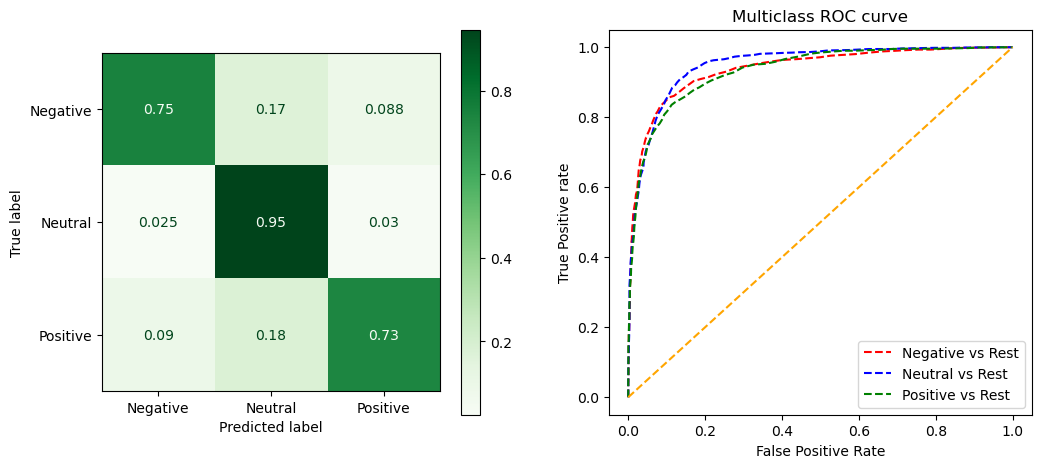

In [8]:
rf_clf = Pipeline([('tfidf', TfidfVectorizer()),
                        ('rf_clf', RandomForestClassifier(random_state=42))])

rf_clf.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rf_clf.predict(X_test)
multiclass_eval(y_test, y_pred, X_test, X_train, rf_clf)

**The model is overfitting to the training data and is not performing that well making predictions on all classes even though they are much better compared to the baseline.**

### <b> 5.1.2 <span style='color:#F1A424'>|</span> Tuned RandomForest: Model #1</b>

**Tuning the parameters of the RF model to check for imporvement.**

In [9]:
# Define parameters to tune
param_grid = {
    'rf_clf__criterion': ['gini', 'entropy'], 
    'rf_clf__n_estimators': [100, 200, 500],
    'rf_clf__max_depth': [5, 8, 15, 25],
    'rf_clf__min_samples_split': [2, 5, 10],
    'rf_clf__min_samples_leaf': [1,5,8]
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5 , n_jobs=-1, verbose=1, scoring='recall_macro')

# Fit Grid Search to training data
grid_search.fit(X_train, y_train)

# Best parameters
print('Best params:', grid_search.best_params_)   

# Best score
print('Best accuracy: ', grid_search.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best params: {'rf_clf__criterion': 'gini', 'rf_clf__max_depth': 25, 'rf_clf__min_samples_leaf': 1, 'rf_clf__min_samples_split': 5, 'rf_clf__n_estimators': 500}
Best accuracy:  0.6107596740716279


**Aplying the hyperparameters to the model.**

Training Score: 0.71             Test Score:0.65


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.43      0.58      1324
           1       0.56      0.99      0.71      1746
           2       0.88      0.40      0.55      1203

    accuracy                           0.65      4273
   macro avg       0.78      0.60      0.61      4273
weighted avg       0.75      0.65      0.62      4273



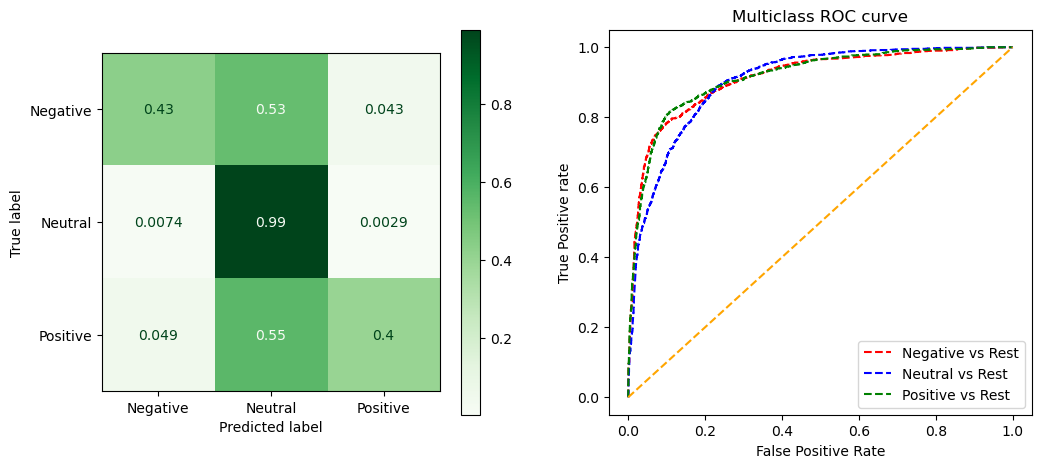

In [10]:
rf_clf_pipe = Pipeline([('tfidf', TfidfVectorizer()),
                        ('rf_clf_pipe', RandomForestClassifier(criterion='entropy', 
                                                               max_depth=25, 
                                                               min_samples_leaf=1,
                                                               min_samples_split=2,
                                                               n_estimators=500,
                                                               random_state=42))])

rf_clf_pipe.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rf_clf_pipe.predict(X_test)
multiclass_eval(y_test, y_pred, X_test, X_train, rf_clf_pipe)

**The tuned model slightly increased perofromance in making predictions for the "neutral" sentiments from 95% to 99%.There was also a 0.32% sharp decrease in making predictions for the "negative" class from 75% to 43% as well as a sharp 33% drop from 73% to 40% for the "positive" class.Ad rop in accuracy is also noted for both the training and test sets. The model is also still overfitting to the training data.**

### <b> 5.1.3 <span style='color:#F1A424'>|</span> Random Oversampled RandomForest: Model #2</b>

Training Score: 1.0             Test Score:0.83


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1324
           1       0.80      0.93      0.86      1746
           2       0.83      0.74      0.78      1203

    accuracy                           0.83      4273
   macro avg       0.83      0.81      0.82      4273
weighted avg       0.83      0.83      0.82      4273



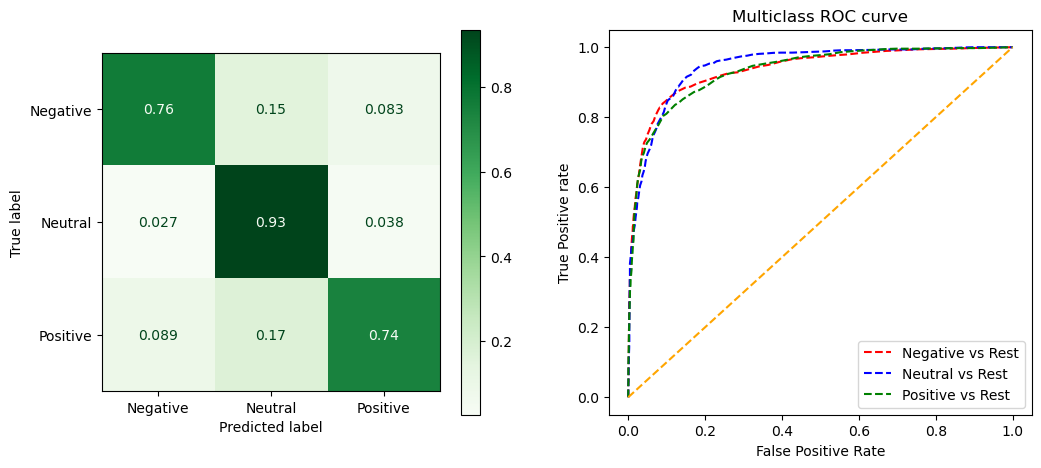

In [11]:
import imblearn

rf_clf_over = imblearn.pipeline.Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('os', RandomOverSampler(random_state=42)),
    ('rf_clf_over', RandomForestClassifier(random_state=42))
])

rf_clf_over.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rf_clf_over.predict(X_test)
multiclass_eval(y_test, y_pred, X_test, X_train, rf_clf_over)

**Oversampling the data in this case hasn't really helped with the neutral class still being higher relative to the positive and negative classes. There is only a slight increase in the test accuracy compared to the first untuned RF model**

### <b> 5.1.4 <span style='color:#F1A424'>|</span> Tuned Random Oversampled RandomForest: Model #2</b>

Training Score: 0.86             Test Score:0.78


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.43      0.58      1324
           1       0.56      0.99      0.71      1746
           2       0.88      0.40      0.55      1203

    accuracy                           0.65      4273
   macro avg       0.78      0.60      0.61      4273
weighted avg       0.75      0.65      0.62      4273



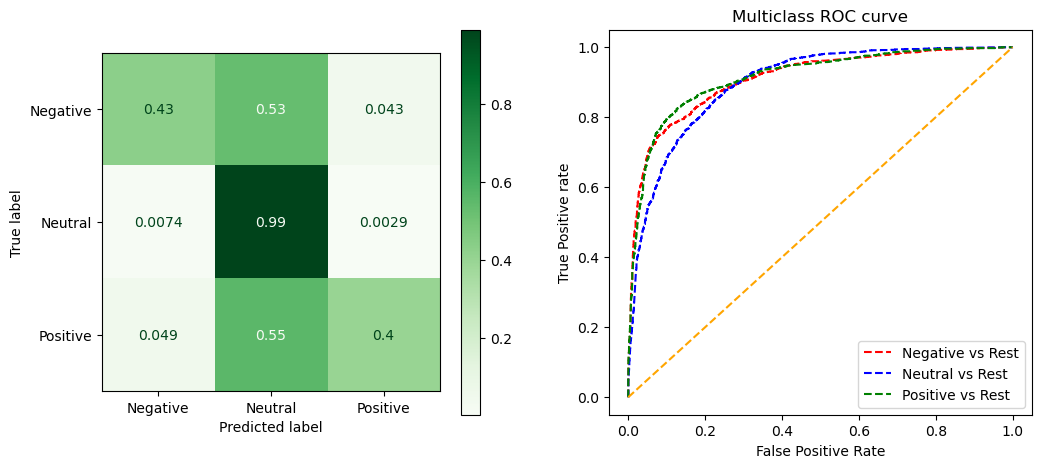

In [12]:
rf_clf_over_tuned = imblearn.pipeline.Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('os', RandomOverSampler(random_state=42)),
    ('rf_clf_over_tuned', RandomForestClassifier(class_weight='balanced', 
                                           criterion='entropy', 
                                           max_depth=25, 
                                           min_samples_leaf=1,
                                           min_samples_split=10,
                                           n_estimators=500,
                                           random_state=42))
])

rf_clf_over_tuned.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rf_clf_pipe.predict(X_test)
multiclass_eval(y_test, y_pred, X_test, X_train, rf_clf_over_tuned)

**The models that seem to have performed well out of all Random forest models are the untuned Random Forest model without the oversampled data and untuned Random Forest model with the oversampled data with almost identical recall macro-avergae score of 0.81. The models are however still overfitting on the training data.**

## <b> 5.2 <span style='color:#F1A424'>|</span> Logistic Regression</b>

### <b> 5.2.1 <span style='color:#F1A424'>|</span> Logistic Regression: Model #1</b>

Training Score: 0.94             Test Score:0.82


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1324
           1       0.81      0.88      0.84      1746
           2       0.81      0.77      0.79      1203

    accuracy                           0.82      4273
   macro avg       0.82      0.81      0.82      4273
weighted avg       0.82      0.82      0.82      4273



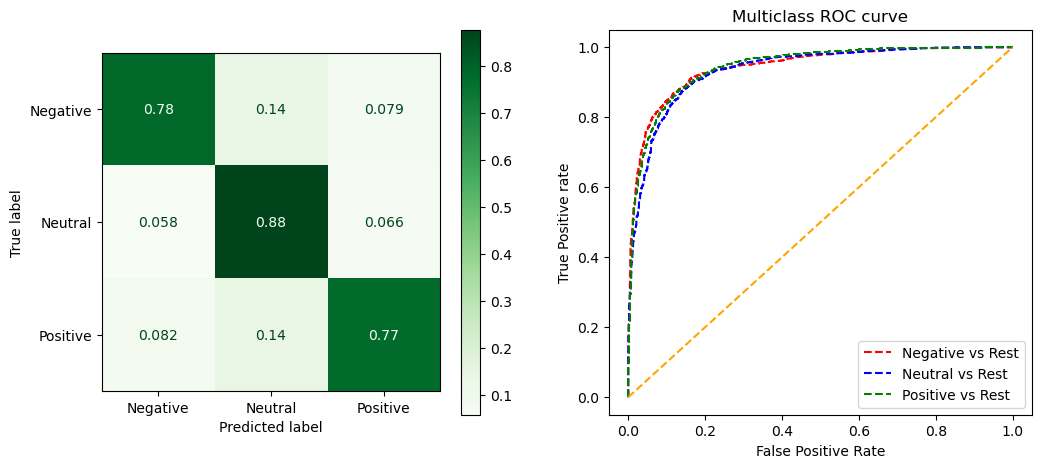

In [13]:
log_clf_pipe = Pipeline([('tfidf', TfidfVectorizer()),
                        ('log_clf_pipe', LogisticRegression(class_weight='balanced', random_state=42,))])

log_clf_pipe.fit(X_train, y_train)

# Predicting the Test set results
y_pred = log_clf_pipe.predict(X_test)
multiclass_eval(y_test, y_pred, X_test, X_train, log_clf_pipe)

**Without any tuning or adjustments, this model is performing sightly similar to the best performing RF models with a 0.81 recall macro score and performing better in each class compared to the baseline. It is overfitting the training data though so we can tune it and see if we can achieve a non-overfitting model.**

### <b> 5.2.2 <span style='color:#F1A424'>|</span> Tuned Logistic Regression: Model #1</b>

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Training Score: 1.0             Test Score:0.91


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      1324
           1       0.89      0.95      0.92      1746
           2       0.90      0.87      0.89      1203

    accuracy                           0.91      4273
   macro avg       0.91      0.90      0.90      4273
weighted avg       0.91      0.91      0.91      4273



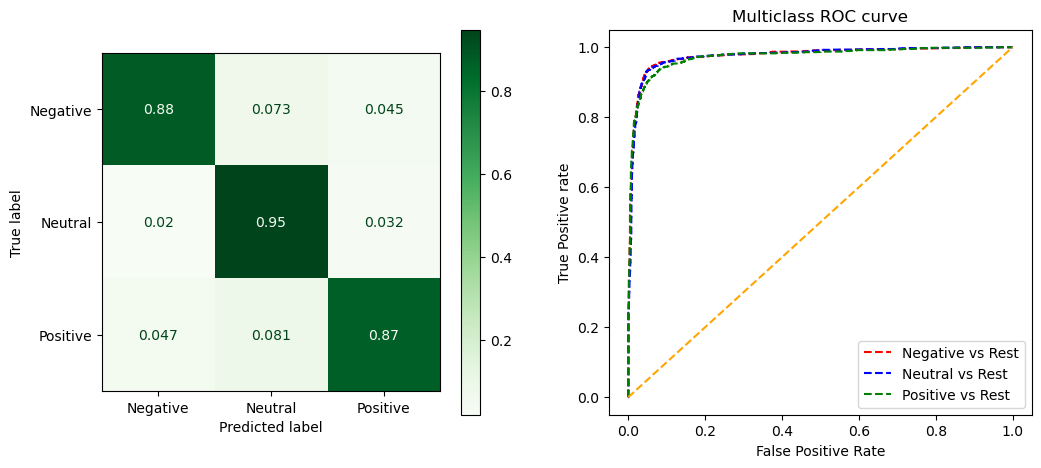

In [14]:
from sklearn.model_selection import GridSearchCV

log_clf = imblearn.pipeline.Pipeline([
    ('tfidf', TfidfVectorizer()),
    
    ('log_clf', LogisticRegression())
])
param_grid = {
    'log_clf__C': [0.01, 0.1, 1, 10, 100],
    'log_clf__penalty': ['l1', 'l2'],
    'log_clf__solver': ['liblinear']
}
log_clf_CV = GridSearchCV(log_clf, param_grid, cv=5, verbose=1, n_jobs=-1)
log_clf_CV.fit(X_train, y_train)
y_pred = log_clf_CV.predict(X_test)
multiclass_eval(y_test, y_pred, X_test, X_train, log_clf_CV)



**This seems to the best performing model so far with a recall-macro-avg score of 0.90. The f1- scores for all the classes are ranging from 89% - 92% meaning that the model is performing well in making it's predictions. the "neutral" class has remained constant in the > 93% range compared to the other models tested. We can also note a 10% increase for both the "negative" and "positive" classes from 78% to 88%. The model has also recorded the highest test accuracy of 91% compared to other models so far. The model is still however overfitting to the training data so we can try to oversample the data and see if it helps.**

### <b> 5.2.3 <span style='color:#F1A424'>|</span> Random Oversampled Logistic Regression: Model #2</b>

Training Score: 1.0             Test Score:0.84


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1324
           1       0.84      0.90      0.87      1746
           2       0.84      0.80      0.82      1203

    accuracy                           0.84      4273
   macro avg       0.85      0.84      0.84      4273
weighted avg       0.84      0.84      0.84      4273



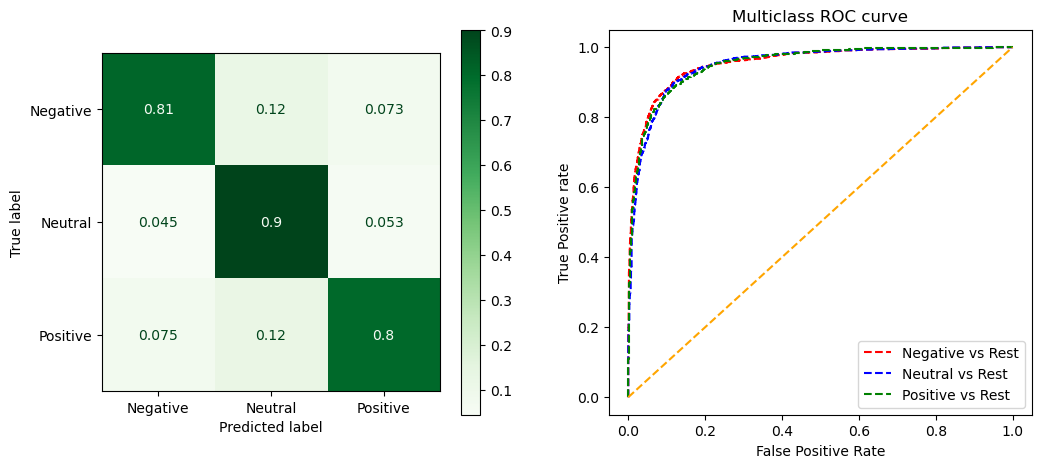

In [15]:
log_clf_over = imblearn.pipeline.Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('os', RandomOverSampler(random_state=42)),
    ('log_clf_over', LogisticRegression(class_weight='balanced', 
                                        C=100, 
                                        penalty='l2', 
                                        solver='liblinear',
                                        random_state=42))
])

log_clf_over.fit(X_train, y_train)

# Predicting the Test set results
y_pred = log_clf_over.predict(X_test)
multiclass_eval(y_test, y_pred, X_test, X_train, log_clf_over)

**There seems to be a decrease in performance compared to the previous tuned LR model but a better recall macro score compared to the baseline and best performing RF models. The model is still overfitting to the training data with a reduced accuracy score of 0.84.**

### <b> 5.2.4<span style='color:#F1A424'>|</span> Tuned Random Oversampled Logistic Regression: Model #2</b>

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Training Score: 1.0             Test Score:0.91


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      1324
           1       0.90      0.95      0.92      1746
           2       0.90      0.87      0.89      1203

    accuracy                           0.91      4273
   macro avg       0.91      0.90      0.91      4273
weighted avg       0.91      0.91      0.91      4273



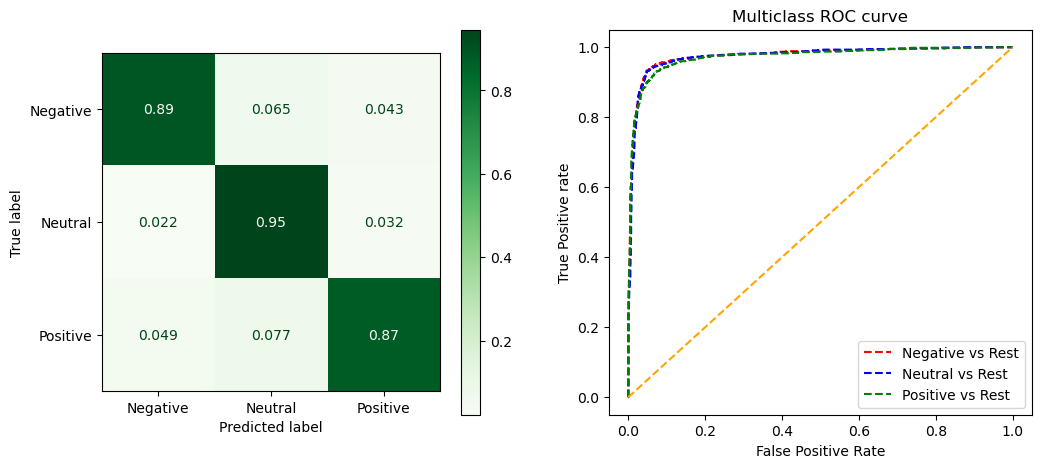

In [16]:
# logistic regression with oversampling and hyperparameter tuning

log_clf = imblearn.pipeline.Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('os', RandomOverSampler(random_state=42)),
    ('log_clf', LogisticRegression())
])
param_grid = {
    'log_clf__C': [0.01, 0.1, 1, 10, 100],
    'log_clf__penalty': ['l1', 'l2'],
    'log_clf__solver': ['liblinear']
}
log_clf_over_CV = GridSearchCV(log_clf, param_grid, cv=5, verbose=1, n_jobs=-1)
log_clf_over_CV.fit(X_train, y_train)
y_pred = log_clf_over_CV.predict(X_test)
multiclass_eval(y_test, y_pred, X_test, X_train, log_clf_over_CV)

**There seems to be a simlar performance with the tuned LR model without oversampling the data but with a slightly lower recall macro score of 0.90. The model is still overfitting to the training data.**

## <b> 5.3 <span style='color:#F1A424'>|</span> Complement NB</b>

**Complement Naive Bayes (CNB) is a variant of the traditional Naive Bayes (NB) algorithm. It's particularly suited for imbalanced data sets where the data is skewed towards one class.**

**In traditional Naive Bayes, we calculate the probability of a feature given a class. However, in Complement Naive Bayes, we calculate the probability of a feature given the complement of a class (i.e., all other classes except the current one). This approach helps to correct the bias towards the majority class, which is a common problem in imbalanced datasets.**

### <b> 5.3.1 <span style='color:#F1A424'>|</span> Complement NB: Model #1</b>

Training Score: 0.9             Test Score:0.72


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.78      0.74      1324
           1       0.80      0.64      0.71      1746
           2       0.66      0.77      0.71      1203

    accuracy                           0.72      4273
   macro avg       0.72      0.73      0.72      4273
weighted avg       0.73      0.72      0.72      4273



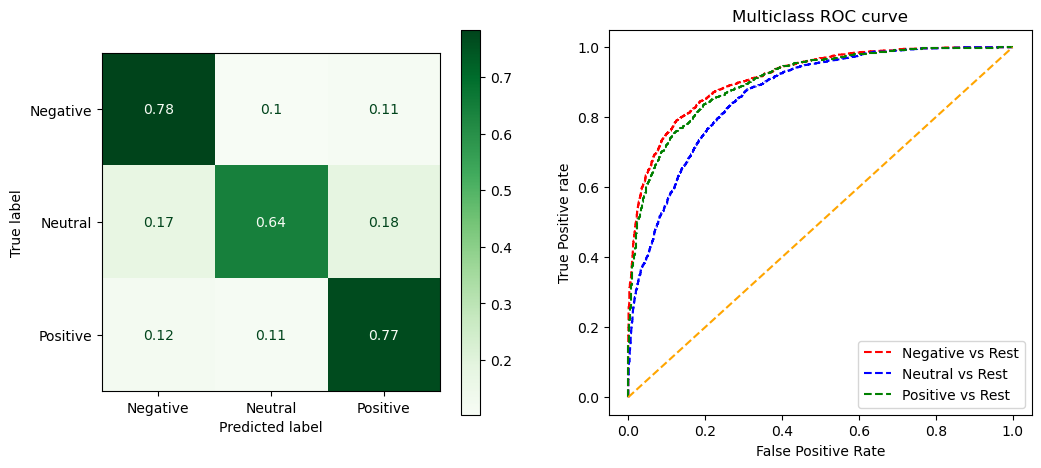

In [17]:
from sklearn.naive_bayes import ComplementNB

nb_clf = Pipeline([('tfidf', TfidfVectorizer()),
                        ('nb_clf', ComplementNB())])

nb_clf.fit(X_train, y_train)

# Predicting the Test set results
y_pred = nb_clf.predict(X_test)
multiclass_eval(y_test, y_pred, X_test, X_train, nb_clf)
                   

**There seems to be a drop in performance while identifying the "neutral" class compared to the previously tested models. The recall macro-average score has also dropped to around 73%. The model is also overfitting to the training data.**

### <b> 5.3.2 <span style='color:#F1A424'>|</span> Tuned Complement NB: Model #1</b>

**Tuning the model.**

In [18]:
parameters = {'nb_clf__alpha': [0.1, 0.5, 1.0, 2.0]}
grid_search = GridSearchCV(nb_clf, parameters, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Use the best estimator to make predictions
y_pred = grid_search.best_estimator_.predict(X_test)

**Tuned Model.**

Training Score: 0.89             Test Score:0.73


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.78      0.75      1324
           1       0.80      0.66      0.72      1746
           2       0.67      0.77      0.72      1203

    accuracy                           0.73      4273
   macro avg       0.73      0.74      0.73      4273
weighted avg       0.74      0.73      0.73      4273



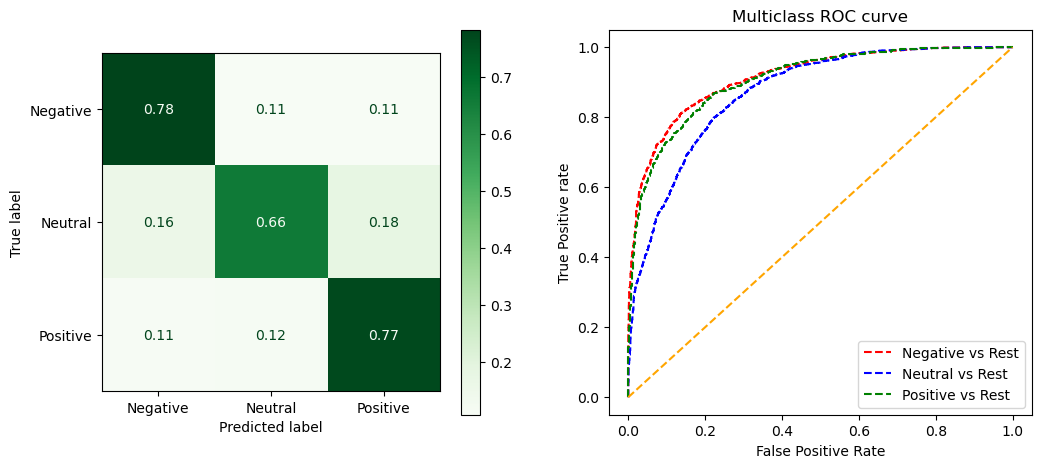

In [19]:
multiclass_eval(y_test, y_pred, X_test, X_train, grid_search.best_estimator_)

**Performance seems to be more or the less same compared to the untuned model. The model is still overfitting to the training data as well.**

### <b> 5.3.3 <span style='color:#F1A424'>|</span> Random Oversampled Complement NB: Model #2</b>

Training Score: 0.87             Test Score:0.69


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.64      0.81      0.72      1324
           1       0.83      0.54      0.65      1746
           2       0.63      0.78      0.70      1203

    accuracy                           0.69      4273
   macro avg       0.70      0.71      0.69      4273
weighted avg       0.72      0.69      0.69      4273



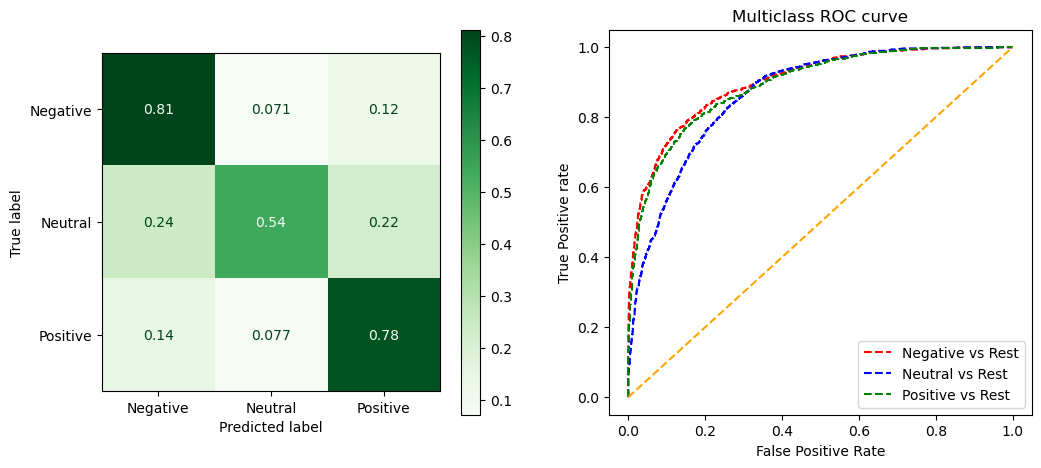

In [20]:
# Add oversampling to the pipeline
nb_clf_over = imblearn.pipeline.Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('os', RandomOverSampler(random_state=42)),
    ('nb_clf_over', ComplementNB())
])

nb_clf_over.fit(X_train, y_train)

# Predicting the Test set results
y_pred = nb_clf_over.predict(X_test)
multiclass_eval(y_test, y_pred, X_test, X_train, nb_clf_over)

**Adding oversampling seems to degrade the performance of the model. We will tune and oversample the data to see if there will be any imporvement.**

### <b> 5.3.4 <span style='color:#F1A424'>|</span> Tuned Random Oversampled Complement NB: Model #2</b>

Training Score: 0.87             Test Score:0.69


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.64      0.81      0.72      1324
           1       0.83      0.54      0.65      1746
           2       0.63      0.78      0.70      1203

    accuracy                           0.69      4273
   macro avg       0.70      0.71      0.69      4273
weighted avg       0.72      0.69      0.69      4273



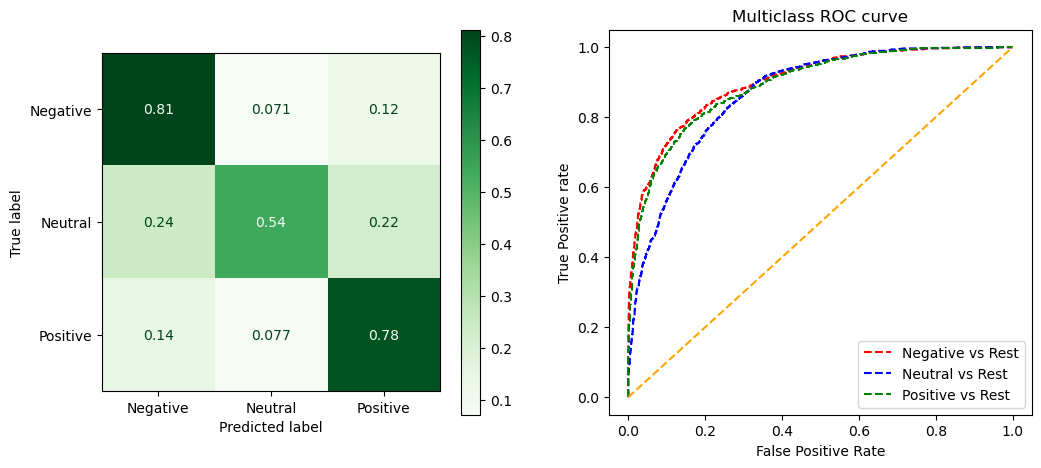

In [21]:
# Tuned Random Oversampled Complement NB
parameters = {'nb_clf_over__alpha': [0.1, 0.5, 1.0, 2.0]}
grid_search = GridSearchCV(nb_clf_over, parameters, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Use the best estimator to make predictions
y_pred = grid_search.best_estimator_.predict(X_test)

multiclass_eval(y_test, y_pred, X_test, X_train, grid_search.best_estimator_)

**Even after tuning the model and oversampling the data, the model performs very similar to the previous Complement NB model with just oversampling the data. In general, the Complement NB models tend to perform very poorly compared to all the other models tested.**

## <div style="color:white;display:fill;border-radius:8px;background-color:#323232;font-size:150%; letter-spacing:1.0px"><p style="padding: 12px;color:white;"><b><b><span style='color:white'><span style='color:#F1A424'>6 |</span></span></b> Evaluate</b></p></div>

**As discussed above, the winner of this task was the tuned logistic regression model with a recall macro score of 90%. The tuned random oversampled logistic regression model also scored the same recall macro - average score of 90% ; however, since it got to the same score only after the random oversampling we are declaring the non-oversampled model as the winner.**

## <b> 6.1 <span style='color:#F1A424'>|</span> Feature Importance - Tuned LR Model</b>

In [22]:
# Get the trained logistic regression model
trained_log_clf = log_clf_CV.best_estimator_.named_steps['log_clf']

# Get the feature names from the TfidfVectorizer
feature_names = log_clf_CV.best_estimator_.named_steps['tfidf'].get_feature_names_out()

# Get the coefficients from the logistic regression model
coefficients = trained_log_clf.coef_[0]

# Create a DataFrame for easier visualization
import pandas as pd
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': coefficients
})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

         Feature  Importance
18400      worst   53.256196
12767   pathetic   48.093332
4692   desperate   46.436917
2578      brutal   46.337555
7842       idiot   44.451244
...          ...         ...
13249    popular  -33.124786
18286        win  -36.423016
7038        good  -36.531986
5952   excellent  -37.707957
7351       happy  -43.890548

[18556 rows x 2 columns]


In [23]:
# Get the coefficients from the logistic regression model and reverse their sign
coefficients = -trained_log_clf.coef_[0]

# Create a DataFrame for easier visualization
import pandas as pd
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': coefficients
})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

         Feature  Importance
7351       happy   43.890548
5952   excellent   37.707957
7038        good   36.531986
18286        win   36.423016
13249    popular   33.124786
...          ...         ...
7842       idiot  -44.451244
2578      brutal  -46.337555
4692   desperate  -46.436917
12767   pathetic  -48.093332
18400      worst  -53.256196

[18556 rows x 2 columns]


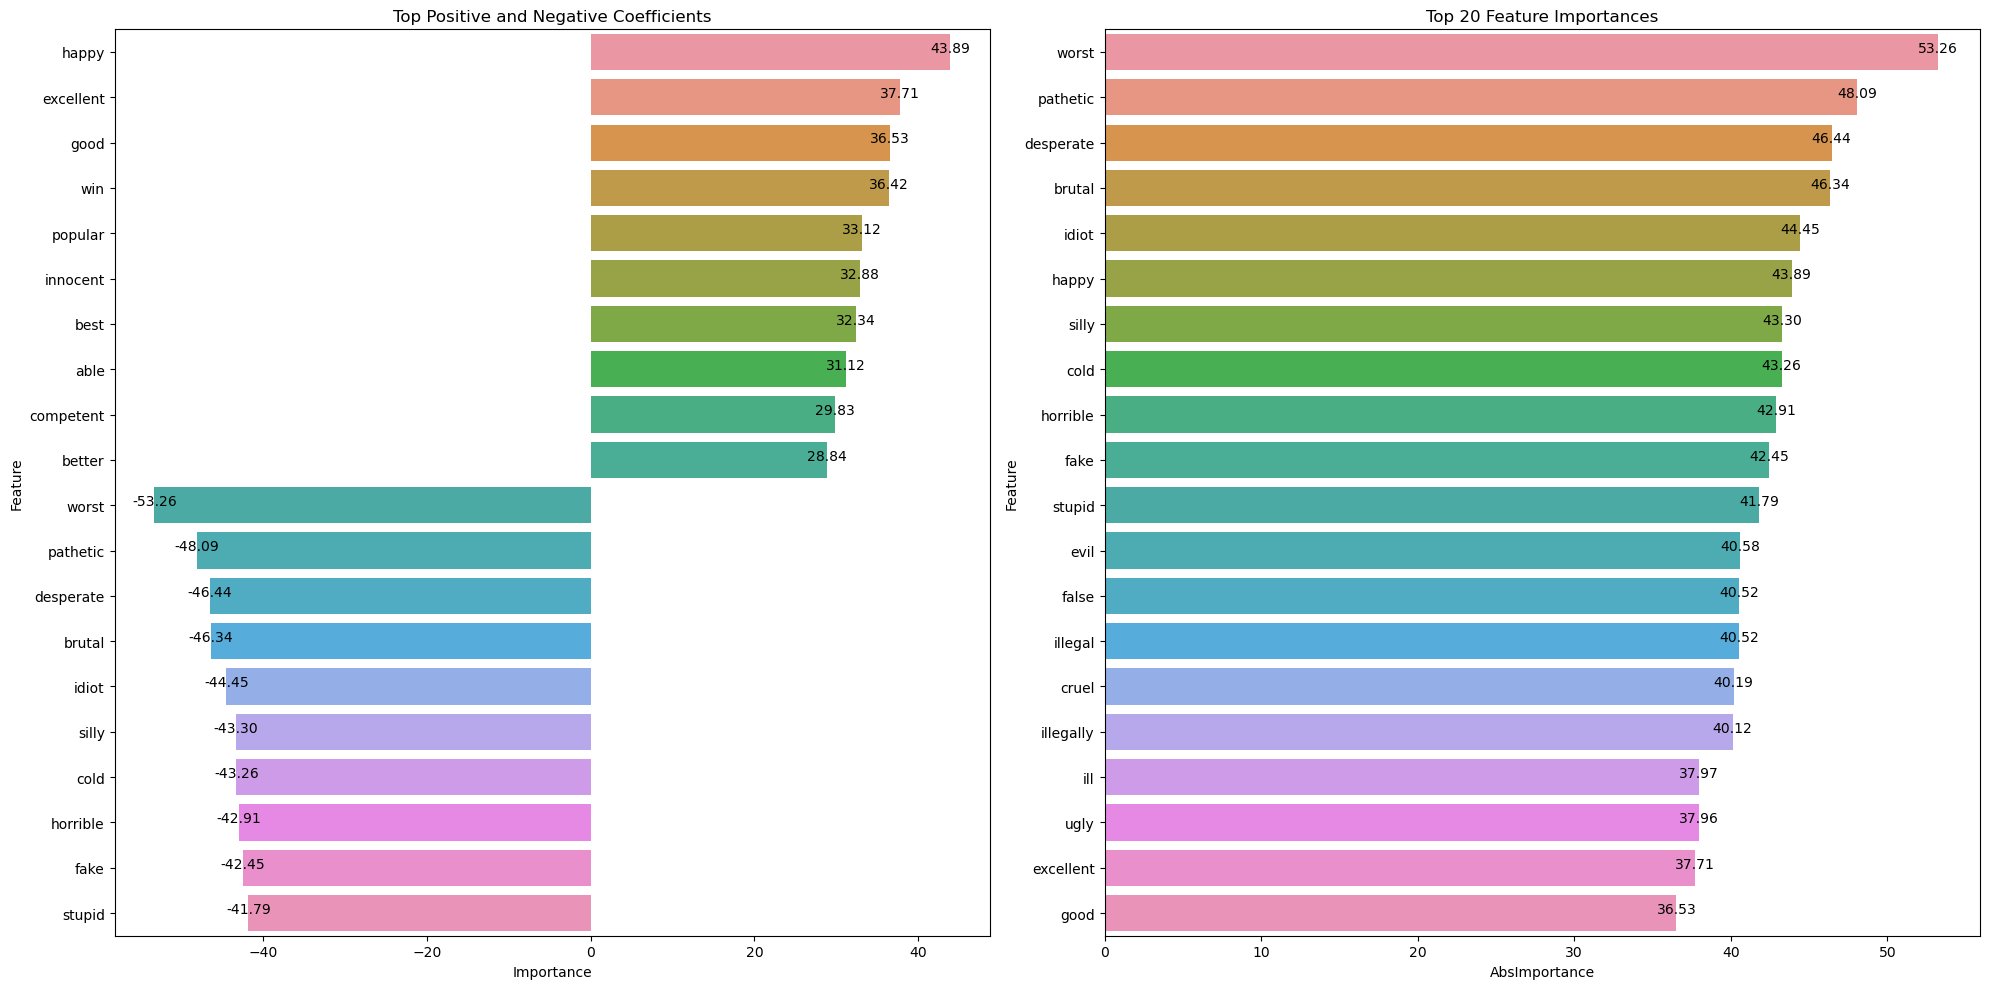

In [24]:

def plot_feature_importance(feature_importances):
    # Get top 10 positive and top 10 negative features by coefficient
    top_10_positive = feature_importances.sort_values(by='Importance', ascending=False).iloc[:10]
    top_10_negative = feature_importances.sort_values(by='Importance').iloc[:10]
    top_20_coefficients = pd.concat([top_10_positive, top_10_negative])

    # Get top 20 features by absolute importance
    top_20_importances = feature_importances.assign(AbsImportance = lambda x: x.Importance.abs()).sort_values(by='AbsImportance', ascending=False).iloc[:20]

    # Create a figure with two subplots side by side
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

    # Plot the top positive and negative coefficients
    coeff_plot = sns.barplot(x='Importance', y='Feature', data=top_20_coefficients, ax=axes[0])
    axes[0].set_title('Top Positive and Negative Coefficients')

    # Add annotations
    for p in coeff_plot.patches:
        coeff_plot.annotate(format(p.get_width(), '.2f'), 
                            (p.get_x() + p.get_width(), p.get_y() + p.get_height()/2.), 
                            ha = 'center', va = 'center', 
                            xytext = (0, 3), 
                            textcoords = 'offset points')

    # Plot the top 20 feature importances
    imp_plot = sns.barplot(x='AbsImportance', y='Feature', data=top_20_importances, ax=axes[1])
    axes[1].set_title('Top 20 Feature Importances')

    # Add annotations
    for p in imp_plot.patches:
        imp_plot.annotate(format(p.get_width(), '.2f'), 
                          (p.get_x() + p.get_width(), p.get_y() + p.get_height()/2.), 
                          ha = 'center', va = 'center', 
                          xytext = (0, 3), 
                          textcoords = 'offset points')

    plt.tight_layout()
    plt.show()

plot_feature_importance(feature_importances)

**On the left of the graph, we can see how each word in the tweet affects the model's prediction. If the tweet had words such as "happy", "excellent" or "innocent" for example, the model's prediction was pushed towards the tweet being positive while words such as "pathetic", "desperate", or "stupid" pushed the prediction towards negative.**

**It is also worth noting that since this is a multiclass model, it is more difficult to interpret how each word is affecting the prediction, however, it still provides insight into important words that the user (Dr. Miguna Miguna) should keep an eye out for.**

## <div style="color:white;display:fill;border-radius:8px;background-color:#323232;font-size:150%; letter-spacing:1.0px"><p style="padding: 12px;color:white;"><b><b><span style='color:white'><span style='color:#F1A424'>7 |</span></span></b> Summary of Findings</b></p></div>

As discussed in the Explore section, our analysis of the tweets showed the following:

`1. What does the user mostly tweet about?`
- **The user frequently tweets about Kenyatta and Uhuru, who are the president and the former president of Kenya, respectively. This suggests that he is very interested or involved in Kenyan politics and that he may have a critical or oppositional stance towards them.**

- **He often uses the word despot, which means a tyrant or a dictator, to describe or refer to Kenyatta or Uhuru. This implies that he has a negative or hostile attitude towards them and that he may accuse them of abusing their power or violating human rights.**

- **He also tweets a lot about Kenyans, which could indicate that he cares about the people of Kenya and their welfare, or that he wants to appeal to them as a potential leader or influencer.**

- **Some of the other common words he uses are must, revolution, fight, and resist, which suggest that he has a strong or radical opinion on certain issues and that he calls for action or change from his followers or the public.**

`2. How conversant is the user with the ***X*** formerly ***Twitter*** platform?`
- **The user (Dr. Miguna Miguna) has a lot of information or opinions to share on Twitter, and he does not want to compromise on the clarity or completeness of his messages. He may also be using hashtags, mentions, or links to increase the visibility or relevance of his tweets. Alternatively, he may simply prefer longer sentences over shorter ones, or he may not be aware of the benefits of brevity and conciseness in online communication.**

- **Tends to use short and simple words in their tweets, which may indicate that they are concise and clear in their communication.**

`3. Sentiment Analysis`

***(a) Sentiment Profile Analysis:***

 - The user has a balanced sentiment profile, meaning that they express a mix of positive, negative, and neutral emotions in their tweets. The user has slightly more neutral tweets than positive or negative ones, which could indicate that they are either objective or indifferent about most topics. The user also has a similar number of positive and negative tweets, which could suggest that they are realistic or conflicted about some issues. However, these are only possible interpretations, and the actual sentiment of the user may vary depending on the context, tone, and language of their tweets.

***(b) Positive Sentiment Analysis:***

- The user's has a positive sentiment profile, uses words that express appreciation, admiration, intelligence, creativity, and joy. They also seem to value ethics, authenticity, and steadfastness. They may be interested in law, art, or literature, as they use words like jurists, collection, and unblemished. They also use words that indicate success, pride, and satisfaction, such as successfully, proudly, and liked.

***(c) Negative Sentiment Analysis:***

- The user's negative sentiment profile, uses words that express a strong negative sentiment towards something or someone, such as anger, disgust, sadness, fear, or contempt. Some of these words are also adverbs or modifiers that intensify the negative tone of the tweet, such as “viciously”, “slowly”, or “contrived”. These words could be used to express criticism, dissatisfaction, frustration, or disappointment.





## <div style="color:white;display:fill;border-radius:8px;background-color:#323232;font-size:150%; letter-spacing:1.0px"><p style="padding: 12px;color:white;"><b><b><span style='color:white'><span style='color:#F1A424'>8 |</span></span></b> Recommendations</b></p></div>

As discussed in the Explore Section, in light of the insights we provided above, our recommendations for the user (Dr. Miguna Miguna) are as follows:

- **The user could try to engage more with their audience by asking them questions, conducting polls, or inviting feedback. This could help them understand their views and needs better, as well as to build trust and rapport with them.**

- **The user could also diversify their topics and sources of information by tweeting about other relevant issues, such as the economy, health, education, or culture. This could help you to broaden your perspective and appeal to a wider range of followers.**

- **The user could be more respectful and constructive in your criticism of Kenyatta and Uhuru, and avoid using inflammatory or abusive language. This could help you to avoid legal troubles, as well as to maintain your credibility and reputation.**

- **The user could also acknowledge the positive aspects or achievements of Kenyatta and Uhuru, and offer suggestions for improvement or alternatives. This could help the user to show that they are fair and balanced, and that they are willing to work with them for the common good of Kenya.**

## <div style="color:white;display:fill;border-radius:8px;background-color:#323232;font-size:150%; letter-spacing:1.0px"><p style="padding: 12px;color:white;"><b><b><span style='color:white'><span style='color:#F1A424'>9 |</span></span></b> Limitations & Future Work</b></p></div>

- **Some text data is going to be more negative or more positive than others. By creating a scale from very negative to somewhat negative to neutral to somewhat positive to very positive, more nuance will be able to be found in the sentiment analysis, and actions can be taken based on the severity of the situation.**

- **Sarcasm and negation can pose significant challenges to sentiment analysis models. In sarcastic text, people express their negative sentiments using positive words, which can easily confuse sentiment analysis models unless they are specifically designed to handle these cases.**

- **There is plenty of other publicly available text data that can be acquired and monitored for sentiment. This data may be on other social media platforms or public forums, or could be product reviews. While product reviews often have an associated rating, that rating may differ from the overall sentiment of the review. Classifying this other data will require a new model because its structure would differ from a tweet.**

- **The dynamic and ever-evolving nature of social media data can present difficulties for maintaining and updating sentiment analysis models and algorithms.**

- **As next steps, if we would like to generalize these models for different applications, we would definitely gather more data from Twitter and potentially other sources. Additionally, if the data had to be labeled by humans, we would set guidelines for what each class of tweet would consist of with examples to make sure that the labels didn't solely rely on emotions. Furthermore, taking the average of sentiment labels for each tweet would result in more accurate labels.**

- **Lastly, the performance of the models could be greatly improved by rethinking this project with Neural Networks. In the future we would use Deep Learning to classify tweets.**



**Saving the best performing model.**

In [25]:
import joblib

In [26]:
model_file = open("log_clf_CV.pkl", "wb")
joblib.dump(log_clf_CV, model_file)
model_file.close()

**Make individual Predictions.**

These are the latest example tweets from Dr. Miguna Miguna's twitter account:
+ ex1 - Dec 9 2023
+ ex2 = Dec 9 2023
+ ex3 = Dec 3 2023

In [27]:
ex1 = "The Great Malcolm X was right about these shameful Uncle Toms and House N**ros!"
ex2 = "Then you betrayed Kenyans to Moi, Kibaki, Kenyatta, #BBI and Satan!Retire and leave Kenyans alone to CONFRONT all the problems you have caused, CONMAN."
ex3 = "Fine. But under which provision of the Constitution would an elected president use to hand over power to someone who would not have competed and won?"

In [28]:
log_clf_CV.predict([ex1, ex2, ex3])

array([2, 1, 2])

In [29]:
log_clf_CV.predict(['Wow! This is an amazing initiative.'])

array([2])

In [30]:
log_clf_CV.predict(['this really sucks!'])

array([1])

In [31]:
log_clf_CV.predict(['The judicial system in Kenya is really corrupt'])

array([0])

In [32]:
log_clf_CV.predict(['Kenyans are livid and angry at the current state of the economy'])

array([0])

In [33]:
log_clf_CV.predict(['The customer service is really great'])

array([2])

In [34]:
print(log_clf_CV.classes_)

[0 1 2]
